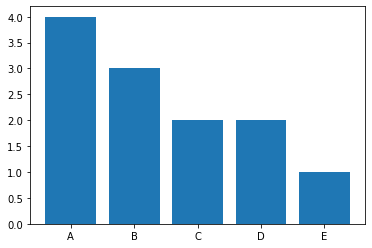

In [3]:
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D', 'E']
ratio = [4,3,2,2,1]
    
#막대 그래프
fig, ax = plt.subplots()

plt.bar(labels, ratio)
#ax.bar(labels, ratio)

plt.show()

In [ ]:
#표준편차 계산함수 stdev()
#std = stdev(array)

In [ ]:
#명목형 자료 변환 - 수치 맵핑
#DataFrame.replace({A:B, C:D,...})
import pandas as pd

titanic = pd.read_csv('titanic.csv')
print('변환 전: \n',titanic['Sex'].head())

titanic = titanic.replace({'male': 0, 'female': 1})

In [ ]:
#명목형 자료 변환 - 더미 방식
#pd.get_dummies(DataFrame[[변수명]])
import pandas as pd

titanic = pd.read_csv('titanic.csv')
print('변환 전: \n',titanic['Embarked'].head())

dummies = pd.get_dummies(titanic[['Embarked']])

In [ ]:
#수치형 자료 변환 - 정규화
import pandas as pd
#정규화 함수 구현
def normal(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

titanic = pd.read_csv('titanic.csv')

Fare = normal(titanic['Fare'])

In [ ]:
#수치형 자료 변환 - 표준화
import pandas as pd
#표준화 함수 구현
def standard(data):
    data = (data-data.mean())/data.std()
    return data
    
titanic = pd.read_csv('titanic.csv')

Fare = standard(titanic['Fare'])

In [ ]:
#결측값 처리
import pandas as pd

titanic = pd.read_csv('titanic.csv')
# 결측값 어디있는지 확인
print(titanic.info(),'\n')

#변수 제거
titanic_1 = titanic.drop(columns=['Cabin'])
# Cabin 변수를 제거 후 결측값이 어디에 남아 있는지 확인합니다.

#결측값 있는 샘플 제거
titanic_2 = titanic_1.dropna()

print(titanic_2.info())

In [ ]:
#이상치 처리
import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic.csv')

titanic_1 = titanic.drop(columns=['Cabin'])
titanic_2 = titanic_1.dropna()

# (Age 값 - 내림 Age 값) 0 보다 크다면 소수점을 갖는 데이터로 분류
outlier = titanic_2[titanic_2['Age']-np.floor(titanic_2['Age']) > 0 ]['Age']

print('소수점을 갖는 Age 변수 이상치')
print(outlier)
print('이상치 처리 전 샘플 개수: %d' %(len(titanic_2)))
print('이상치 개수: %d' %(len(outlier)))

#이상치 처리
titanic_3 = titanic_2[titanic_2['Age']-np.floor(titanic_2['Age']) == 0 ] 
print('이상치 처리 후 샘플 개수: %d' %(len(titanic_3)))

In [ ]:
#feature 데이터와 label 데이터를 분리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = titanic_3.drop(columns=['Survived'])
y = titanic_3['Survived'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)